**Task 1.2**

*Implement a simple Genetic Algorithm (GA) to minimize the fitness function*

In [1]:
# Oppdatert versjon - Fungerer nå!

# Code inspired by https://medium.com/datacat/simple-genetic-algorithm-in-python-from-scratch-d87cd88626c5
# And inspired by the procedure described in Tutorial 3
# And ...

import random as rand
import math
import numpy as np


# Defining the fitness function for the GA
def f(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2


# Defining main parameters
populations = 4
crossoverProbability = 0.25
mutationProbability = 0.5
totalGenerations = 100

# Initialization - create population from random number between -10 and 10, based on the defined population size
globalChromosome = []
for i in range(populations):
    x = rand.randint(-10, 10)
    y = rand.randint(-10, 10)
    globalChromosome.append((x, y))

startingPopulation = globalChromosome

# Calculate fitness of the chromosomes in the population
def calculateFitness(chromosomeFitness, populations):
    fitnessValues = []
    for i in range(populations):
        xGene = chromosomeFitness[i][0]
        yGene = chromosomeFitness[i][1]
        fitness = f(xGene, yGene)
        fitnessValues.append(fitness)
    return fitnessValues


# Selection - Using Roulette wheel selection to select the parents of the generation - finner ut probability of choosing the different chromosomes (?) - så bruke dette videre i GA til å velge ut parents, så her bare regne ut hva snas. er for hver chromosome in population
# starte med population og regne ut invers av deres verdier (så invers av hver chromosome (?)) and adding 1 to denominator - using the formula 1/(value+1)
def rouletteWheelSelection(populations, results, chromosomeSelection):
    #print("Chromosomes in start of roulettewheel: ", chromosomeSelection)
    # Find the inverted of all the values in the population using the formula 1/(value+1) and adding the calculated inverse to a list, to a minimization problem
    invertedValue = []
    for i in range(populations):
        inverted = (1 / (results[i] + 1))
        invertedValue.append(inverted)

    # calculate probability of each fitness value of the chromosomes in the populations, by sumarizing the inverted values and dividing the inverted values
    # Calculate selection probability for each individual based on its inverted fitness value relative to the total of inverted fitness
    invertedValuesSum = sum(invertedValue)
    selectionProbability = []
    for i in range(populations):
        probability = invertedValue[i] / invertedValuesSum
        selectionProbability.append(probability * 100)  # multiply by 100 to convert to percent

    # Noe rart som skjer her - plutselig blir det med noen kandidater i chromosome som ikke var i denne generasjonen
    #print("roulettewheel chromosome candidates: ", chromosomeSelection)

    # Choose one random parent candidate based on the calculated probability
    parentCandidate = rand.choices(chromosomeSelection, weights=selectionProbability, k=1)
    # Return a chosen candidate for parent to be used in the parent combinations
    #print("Parent candidate: ", parentCandidate, " And parent candidate 0 ", parentCandidate[0])

    return parentCandidate[0]


# Choose parents - do random selection of the different hypotheses with weights calculated based on the roulette wheel selection method, with possibility of selecting same sample multiple times
# Do random selection based on roulette wheel selection for parents and combine into pairs
def pairParents(populations, chromosomeParents):
    parents = []
    #print("Starting parent array ", parents)
    #print("starting population for parent selection: ", chromosomeParents)

    # Combine parents into pairs - one parent (candidate) can be chosen multiple times based on the selection probability, and can be paired with itself (?)
    fitnessResults = calculateFitness(chromosomeParents, populations)
    #print("Chromosomes after calculating fitness (in pairParents): ", chromosomeParents)
    print("Fitness values for chromosomes in generation: ", fitnessResults, "\n")
    for i in range(round(populations/2)):
        parent1 = rouletteWheelSelection(populations, fitnessResults, chromosomeParents)
        parent2 = rouletteWheelSelection(populations, fitnessResults, chromosomeParents)
        parents.append((parent1, parent2))
        #print("Chosen parents ", parent1, parent2)

    #print("Chromosomes after selecting (in pairParents): ", chromosomeParents)

    # return list of parent pairs
    #print("Resulting parents array ", parents)
    return parents


# Crossover - basert på sansynligheten, bytt plass eller ikke på x og y verdi - crossover between two parents results in two children and replave the old population
def crossover(parents, crossoverProbability):
    children = []

    for i in range(len(parents)):
        parent1 = parents[i][0]
        parent2 = parents[i][1]

        # Perform crossover if random generated number, between 0 and 1, is less than the crossover probability
        if rand.random() < crossoverProbability:
            # crossover by swapping the x and y values from parent1 and parent 2

            #print("Parent 1 crossover", parent1)
            child1 = (parent1[0], parent2[1])
            child2 = (parent2[0], parent1[1])
        else:
            # if not performin crossover, children genes are identical to parents
            child1 = parent1
            child2 = parent2
        children.append(child1)
        children.append(child2)

    return children


# Mutation - basert på sansynligheten, velg et nytt tilfeldig tall mellom -10 og 10
def mutation(children, mutationProbability):
    # Mutation is performed for each gene (x and y) for the provided child
    mutatedChild = []

    for child in children:
      geneArr = []
      for gene in child:
          # For each gene of the child, perform mutation if random number is less than the probability of mutation
          if rand.random() < mutationProbability:
              # Mutate the gene by replacing it with a random number within a defined range (-10, 10)
              mutatedGene = rand.randint(-10, 10)
              #mutatedChild.append(mutatedGene)
              geneArr.append(mutatedGene)
          else:
              # Keep the original gene if mutation does not occur
              #mutatedChild.append(gene)
              geneArr.append(gene)
      mutatedChild.append((geneArr[0], geneArr[1]))
    return tuple(mutatedChild)

# Defining the genetic algorithm - utfør i iterations/runder hvor lager en generasjon for hver runde og lagrer den beste fra hver runde, i så mange runder som det er forhåndsdefinert generasjoner (totalGenerations)
def geneticAlgorithm(chromosome, populations, totalGenerations, crossoverProbability, mutationProbability):
    print("***** Genetic Algorithm *****")
    print("Initial Chromosomes: ", chromosome)
    print("Number of population: ", populations)
    print("Total number of generations: ", totalGenerations)
    print("Crossover Probability: ", crossoverProbability)
    print("Mutation Probability: ", mutationProbability)
    print("______________________________________________________________________________ \n")

    generation = 0
    chosenCandidates = []
    localChromosome = chromosome


    for i in range(totalGenerations):
        print("Generation: ", generation)
        print("Starting chromosomes in generation: " + str(localChromosome) + "\n")
        generation = generation + 1

        # Choose the candidates for the parents and pair
        parents = pairParents(populations, localChromosome)
        print("Parent Pairs: " + str(parents) + "\n")

        # parent1 = parents[1]
        # children = crossover(parent1, parent2, crossoverProbability)
        # Skriver ut parents:
        #for i in range(len(parents)):
            #print("Pair " + str(i + 1) + ":\n")
            #print("Mom:" + str(parents[i][0]) + "\n")
            #print("Dad:" + str(parents[i][1]) + "\n")

        # Performe crossover on parent pairs and produce two children per pair
        children = crossover(parents, crossoverProbability)
        #chromosome = children
        print("Children after crossover: ", children)
        #print("New chromosomes: ", chromosome)

        # Performe mutation on children
        mutatedChildren = mutation(children, mutationProbability)
        print("Mutated children: " + str(mutatedChildren) + "\n")
        localChromosome = mutatedChildren
        print("New chromosomes for the generation: ", localChromosome)


        print("______________________________________________________________________________ \n")

    globalChromosome = localChromosome
    print("***** Genetic Algorithm Finished! *****")
    print("Finished chromosomes: ", globalChromosome)
    print("Starting population: ", startingPopulation)


geneticAlgorithm(globalChromosome, populations, totalGenerations, crossoverProbability, mutationProbability)

***** Genetic Algorithm *****
Initial Chromosomes:  [(5, -7), (-2, -4), (-4, 8), (4, -3)]
Number of population:  4
Total number of generations:  100
Crossover Probability:  0.25
Mutation Probability:  0.5
______________________________________________________________________________ 

Generation:  0
Starting chromosomes in generation: [(5, -7), (-2, -4), (-4, 8), (4, -3)]

Fitness values for chromosomes in generation:  [2258, 170, 2978, 40] 

Parent Pairs: [((4, -3), (4, -3)), ((4, -3), (4, -3))]

Children after crossover:  [(4, -3), (4, -3), (4, -3), (4, -3)]
Mutated children: ((4, -3), (-3, -3), (4, -4), (4, -3))

New chromosomes for the generation:  ((4, -3), (-3, -3), (4, -4), (4, -3))
______________________________________________________________________________ 

Generation:  1
Starting chromosomes in generation: ((4, -3), (-3, -3), (4, -4), (4, -3))

Fitness values for chromosomes in generation:  [40, 26, 170, 40] 

Parent Pairs: [((4, -4), (4, -3)), ((-3, -3), (-3, -3))]

Child

**Task 1.3**

*Implement simple Gradient Descent Method*

In [2]:
# Fungerer! også med stopping criteria

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import random as rand

# Define variables
x, y = sp.symbols('x y')

# Defining the function for the Gradient Descent method
def f(x,y):
    return ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)

# Finding the partial derivatives of the function with the use of a library
partialX = sp.diff(f(x,y), x)
partialY = sp.diff(f(x,y), y)

# Function to calculate the partial derivates for the provided values
def findDerivate(valx, valy):
    derivateX = partialX.evalf(subs={x: valx, y: valy})
    derivateY = partialY.evalf(subs={x: valx, y: valy})
    derivateX = float(derivateX)
    derivateY = float(derivateY)

    # Print the original gradient values for debugging
    #print(f"Original gradientX: {derivateX}, gradientY: {derivateY}")

    # Clip the gradients to make sure they stay within a manageable range
    #derivateX = np.clip(derivateX, -1e5, 1e5)
    #derivateY = np.clip(derivateY, -1e5, 1e5)

    return derivateX, derivateY

print("Function: ", f(x,y))
print("Partial derivative for x:", partialX)
print("Partial derivative for y:", partialY, "\n")

# Gradient Decent method
def gradientDescent(startX, startY, learningRate, iterations, stoppingCriteria):
    print("***** Gradient Decent Method *****")
    print("Starting values: x = ", startX, " y = ", startY)
    print("Learning Rate: ", learningRate)
    print("Number of iterations: ", iterations)
    print("__________________________________________________________________________________________________ \n")

    # Initial parameters
    #x = startX
    #y = startY

    currentX = startX
    currentY = startY

    # Gradient Descent Iterations
    for i in range(iterations):
        print("Iteration:", i+1)
        value = f(currentX,currentY)

        # Calculate gradients using the partial derivates of the function and update x and y values
        gradientX, gradientY = findDerivate(currentX, currentY)

        newX = currentX - learningRate * gradientX
        newY = currentY - learningRate * gradientY

        # Check if the change is smaller than the stopping criteria
        # Stopping Criteria: Use Euclidean distance to check if change in position is less than the stopping criteria, as this might mean that the minima is located
        if np.sqrt((newX - currentX)**2 + (newY - currentY)**2) < stoppingCriteria:
            #print(f"Stopping early at iteration {i + 1} due to small change in position")
            print("Stopping criteria met at iteration ", i+1, " due to little change in position \n")
            print("__________________________________________________________________________________________________ \n")
            break

        currentX, currentY = newX, newY

        print("Computed value for x derivative:", gradientX, "and for y derivative:", gradientY)
        print("Gradient Descent value:", value)
        print("__________________________________________________________________________________________________ \n")

    print("***** Gradient Decent Method Finished *****")
    print("Values: x = ", currentX, " y = ", currentY)
    print("Gradient Decent Value: ", value, "\n")

# Choose random start values from the defined range
#startX = rand.randint(-10,10)
#startY = rand.randint(-10,10)
startX = -3
startY = 0

# defining method criteria
stoppingCriteria = 0.001
learningRate = 0.001
iterations = 100

# Calculate gradient descent
gradientDescent(startX, startY, learningRate, iterations, stoppingCriteria)


Function:  (x + y**2 - 7)**2 + (x**2 + y - 11)**2
Partial derivative for x: 4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
Partial derivative for y: 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22 

***** Gradient Decent Method *****
Starting values: x =  -3  y =  0
Learning Rate:  0.001
Number of iterations:  100
__________________________________________________________________________________________________ 

Iteration: 1
Computed value for x derivative: 4.0 and for y derivative: -4.0
Gradient Descent value: 104
__________________________________________________________________________________________________ 

Iteration: 2
Computed value for x derivative: 3.6873917439999997 and for y derivative: -4.104031744
Gradient Descent value: 103.96841676851199
__________________________________________________________________________________________________ 

Iteration: 3
Computed value for x derivative: 3.393136646280235 and for y derivative: -4.215833379887382
Gradient Descent value: 103.93828963632092
_

**Task 2.2**

*Implementation of the K Nearest Neighbor (KNN) classifier*

KNN Score: 0.6
K value: 1
Distance metric: euclidean


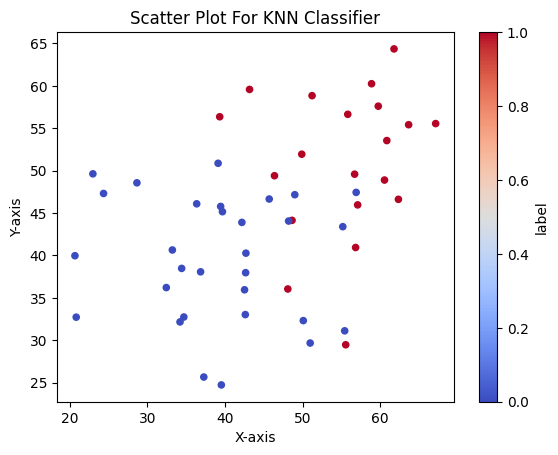

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Code inspired by the sklearn library for KNeighborsClassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit
# And from https://medium.com/analytics-vidhya/easy-knn-algorithm-using-scikit-learn-7f6e256c9453
# And Tutorial 3

# Variables used in the KNN classifier, k can be 1, 7, 15, and 31, distance can be Euclidean, Manhattan, or Chebyshev
k = 1
distance = "euclidean"

# Leser inn dataen fra CSV filen
train = pd.read_csv("train.csv",encoding="UTF-8")
test = pd.read_csv("test.csv",encoding="UTF-8")

# Show the values in a graph
train.plot.scatter(x="1", y="2",c = "label", cmap='coolwarm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot For KNN Classifier')

# Creates an instance of the KNN classifyer object
knn = KNeighborsClassifier(n_neighbors = k,  metric = distance)

# Train the classifyer by passing in the training data and lables
knn.fit(train,train["label"])

# Compute the accuracy of the classifier based on the test values and then print the score of the classifier
score = knn.score(test,test["label"])
print("KNN Score: " + str(score))
print("K value: " + str(k))
print("Distance metric: " + str(distance))

plt.show()


**Task 1.1**



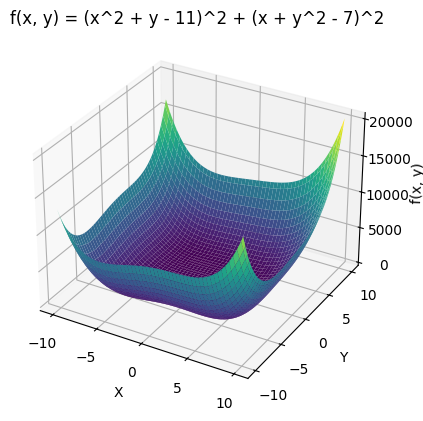

In [4]:
# 3D graph:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Generate grid of points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2')

plt.show()


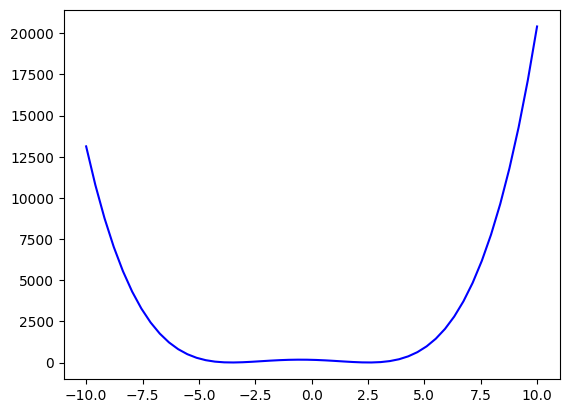

In [5]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

#Function for defining mathematical function
def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2            #Defines the mathematical function we are working with (Optimizing)

#plt.rcParams["figure.figsize"] = [10, 5]            #Defines the figure
#plt.rcParams["figure.autolayout"] = True

x = np.linspace(-10,10)                         #Defines the range of x values
y = np.linspace(-10,10)                         #Defines the range of y values

plt.plot(x, f(x,y), color='blue')    #Plot the function
plt.show()

Test:

C:\Users\47412\AppData\Local\Temp\ipykernel_232\3595813476.py:17: UserWarning: The following kwargs were not used by contour: 'projection'
  contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', projection='3d')


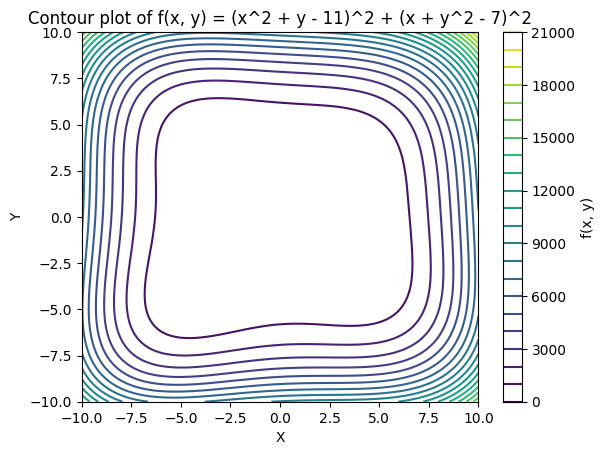

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Generate grid of points
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function
plt.figure()
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis', projection='3d')
plt.colorbar(contour, label='f(x, y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour plot of f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2')

plt.show()

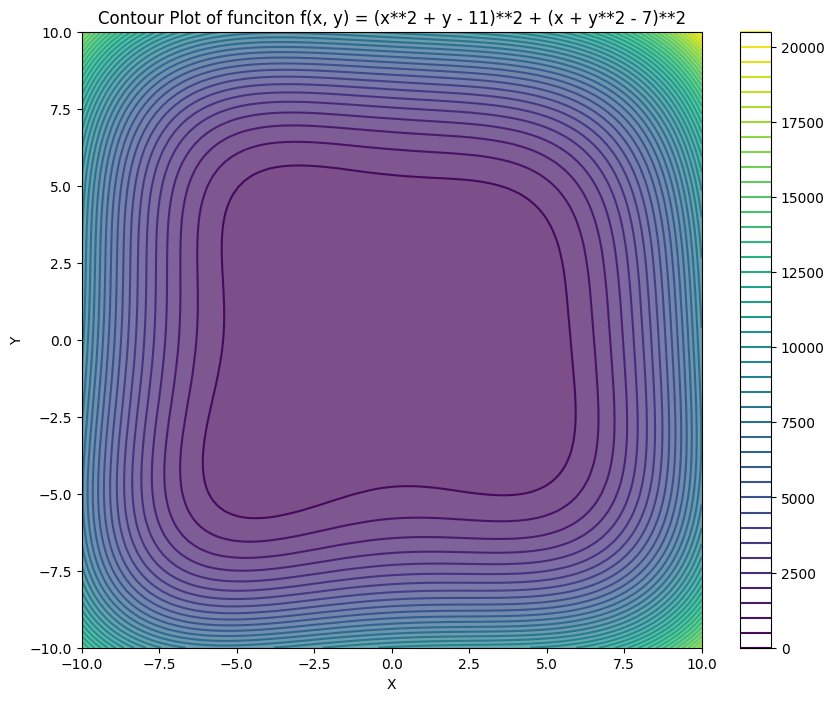

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of x and y values
#x = np.linspace(-6, 6, 400)
#y = np.linspace(-6, 6, 400)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 2D contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)

# Add a color bar which maps values to colors
plt.colorbar(contour)

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of funciton f(x, y) = (x**2 + y - 11)**2 + (x + y**2 - 7)**2')

# Show the plot
plt.show()